In [5]:
import numpy as np
import pandas as pd
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import statsmodels.api as sm
from scipy.stats import norm

In [2]:
df = pd.read_excel('index_data.xlsx')
df.head()

,субъект,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,...,температурные аномалии,сильный снег и метели,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность,Индекс природного риска,Индекс риска
0,Республика Бурятия,0,2,0,1,2,0,3,2,3,...,2,0,2,1,0,2,2,0,27,42
1,Республика Саха (Якутия),1,0,1,1,0,2,0,0,2,...,3,0,0,0,0,0,0,0,10,25
2,Забайкальский край,1,3,2,0,2,3,2,2,0,...,0,0,0,0,0,2,0,0,18,34
3,Камчатский край,2,0,0,2,0,0,3,0,0,...,0,2,0,0,0,0,0,3,22,29
4,Приморский край,2,0,0,0,0,2,0,3,0,...,0,1,3,0,0,0,0,0,20,29


In [11]:
df['Индекс риска'].mean()

22.611764705882354

In [12]:
df['Индекс риска'].var()

111.26414565826335

In [13]:
# Параметры нормального распределения (среднее и стандартное отклонение)
mu = 22.61  # среднее значение (предположим)
sigma = 10.55  # стандартное отклонение

# Генерация данных
np.random.seed(0)
data = np.random.normal(mu, sigma, 1000)

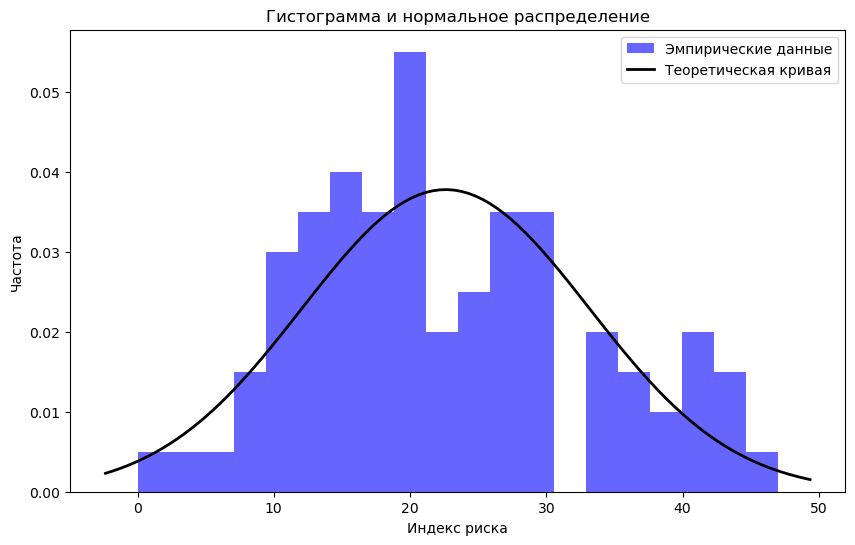

In [15]:
plt.figure(figsize=(10, 6))

# Гистограмма
plt.hist(df['Индекс риска'], bins=20, density=True, alpha=0.6, color='blue', label='Эмпирические данные')

# Теоретическая нормальная кривая
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label='Теоретическая кривая')

# Настройки графика
plt.xlabel('Индекс риска')
plt.ylabel('Частота')
plt.title('Гистограмма и нормальное распределение')
plt.legend()
plt.show()

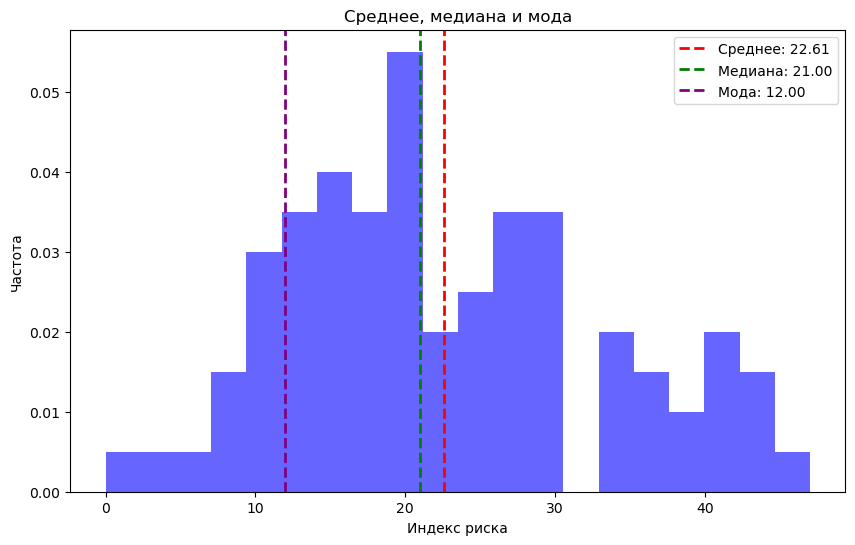

In [16]:
plt.figure(figsize=(10, 6))

# Гистограмма
plt.hist(df['Индекс риска'], bins=20, density=True, alpha=0.6, color='blue')

# Среднее, медиана, мода
mean = np.mean(df['Индекс риска'])
median = np.median(df['Индекс риска'])
values, counts = np.unique(df['Индекс риска'], return_counts=True)
mode = values[np.argmax(counts)]

# Вертикальные линии
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean:.2f}')
plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label=f'Медиана: {median:.2f}')
plt.axvline(mode, color='purple', linestyle='dashed', linewidth=2, label=f'Мода: {mode:.2f}')

# Настройки
plt.xlabel('Индекс риска')
plt.ylabel('Частота')
plt.title('Среднее, медиана и мода')
plt.legend()
plt.show()

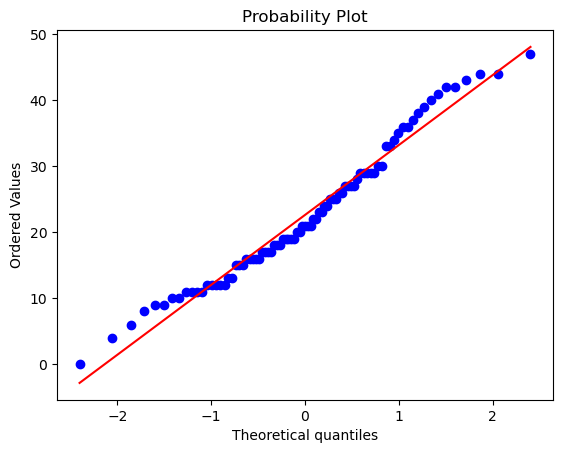

In [17]:
import scipy.stats as stats
stats.probplot(df['Индекс риска'], dist="norm", plot=plt)
plt.show()

<Axes: title={'center': 'Boxplot для визуализации выбросов по индексу риска ЧС'}, xlabel='Переменная', ylabel='Значение'>

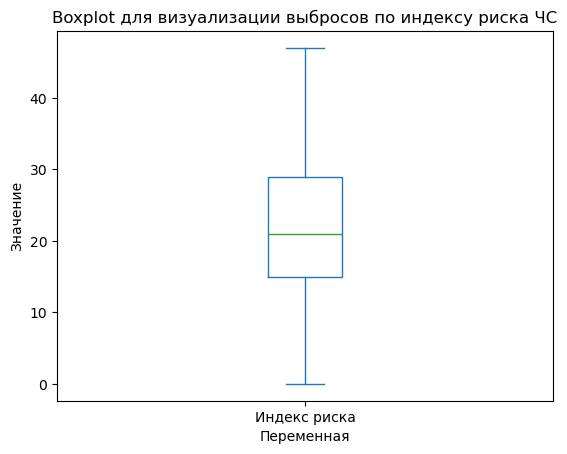

In [39]:
df['Индекс риска'].plot(kind = 'box', vert = True, title = 'Boxplot для визуализации выбросов по индексу риска ЧС', ylabel = 'Значение', xlabel = 'Переменная', fontsize = 10)

In [18]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pygadm

In [56]:
gdf = pygadm.Items(name="Russia", content_level=1)

In [57]:
gdf = gpd.GeoDataFrame(gdf, geometry=gdf.geometry, crs='epsg:4326')

In [58]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [59]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   geometry   83 non-null     geometry
 1   GID_1      83 non-null     object  
 2   GID_0      83 non-null     object  
 3   NAME_0     83 non-null     object  
 4   NAME_1     83 non-null     object  
 5   VARNAME_1  83 non-null     object  
 6   NL_NAME_1  83 non-null     object  
 7   TYPE_1     83 non-null     object  
 8   ENGTYPE_1  83 non-null     object  
 9   CC_1       83 non-null     object  
 10  HASC_1     83 non-null     object  
 11  ISO_1      83 non-null     object  
dtypes: geometry(1), object(11)
memory usage: 7.9+ KB


In [60]:
gdf.head()

,geometry,GID_1,GID_0,NAME_0,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,ISO_1
0,"MULTIPOLYGON (((40.3872 44.6721, 40.375 44.642...",RUS.1_1,RUS,Russia,Adygey,Adygea|Adygeya|Adygheya|Republic,РеспубликаАдыгея,Respublika,Republic,NA,RU.AD,NA
1,"MULTIPOLYGON (((82.7466 50.949, 82.7307 50.947...",RUS.2_1,RUS,Russia,Altay,AltayskiyKray,Алтайскийкрай,Kray,Territory,NA,RU.AL,NA
2,"MULTIPOLYGON (((130.503 48.8565, 130.4885 48.8...",RUS.3_1,RUS,Russia,Amur,AmurskayaOblast,Амурскаяобласть,Oblast,Region,NA,RU.AM,NA
3,"MULTIPOLYGON (((44.5125 60.932, 44.3058 60.952...",RUS.4_1,RUS,Russia,Arkhangel'sk,Arcangelo|Archangel|Archangelsk|,Архангельскаяобласть,Oblast,Region,NA,RU.AR,NA
4,"MULTIPOLYGON (((47.8749 45.5692, 47.8498 45.55...",RUS.5_1,RUS,Russia,Astrakhan',Astrachan|AstrakhanskayaOblast,Астраханскаяобласть,Oblast,Region,NA,RU.AS,NA


In [61]:
gdf = gdf.to_crs('+proj=longlat +lon_wrap=180')

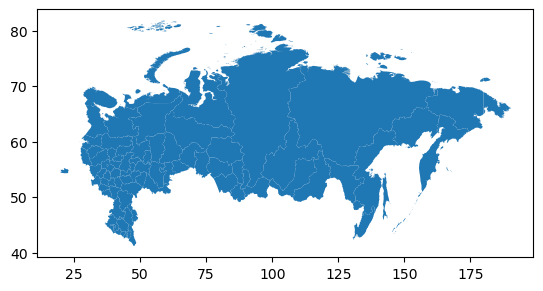

In [62]:
gdf.plot()
plt.show()

In [101]:
data = pd.read_excel('index_map.xlsx')
data

,region,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,...,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность,Индекс природного риска,Индекс риска,кластер (Kmodes),кластер (Kmeans)
0,Buryat,0,2,0,1,2,0,3,2,3,...,2,1,0,2,2,0,27,42,2,1
1,Sakha,1,0,1,1,0,2,0,0,2,...,0,0,0,0,0,0,10,25,2,1
2,Zabaykal'ye,1,3,2,0,2,3,2,2,0,...,0,0,0,2,0,0,18,34,1,1
3,Kamchatka,2,0,0,2,0,0,3,0,0,...,0,0,0,0,0,3,22,29,3,3
4,Primor'ye,2,0,0,0,0,2,0,3,0,...,3,0,0,0,0,0,20,29,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Tambov,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,10,11,2,2
79,Tver',1,0,1,1,2,1,0,3,0,...,0,0,0,0,0,0,10,24,1,1
80,Tula,1,0,1,1,0,3,2,3,1,...,0,0,0,0,0,0,8,25,1,1
81,Yaroslavl',1,2,0,1,2,1,1,3,0,...,0,0,0,0,0,0,5,16,2,2


In [103]:
risk = gdf.merge(data, how='left', left_on='NAME_1', right_on='region')
risk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 57 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   geometry                                                83 non-null     geometry
 1   GID_1                                                   83 non-null     object  
 2   GID_0                                                   83 non-null     object  
 3   NAME_0                                                  83 non-null     object  
 4   NAME_1                                                  83 non-null     object  
 5   VARNAME_1                                               83 non-null     object  
 6   NL_NAME_1                                               83 non-null     object  
 7   TYPE_1                                                  83 non-null     object  
 8   ENGTYPE_1               

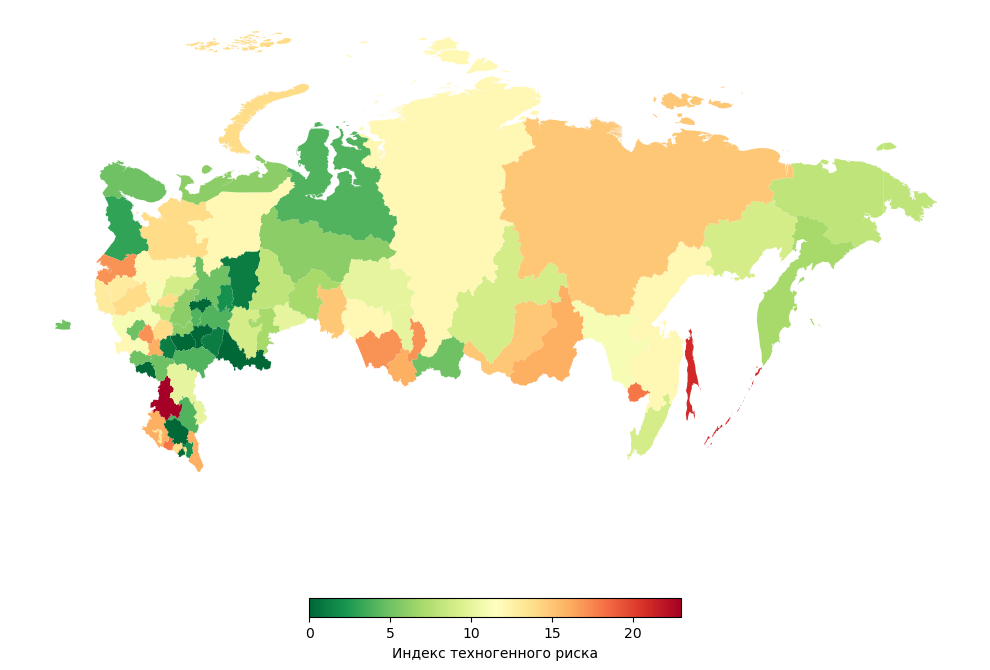

In [34]:
fig, ax = plt.subplots(1, figsize=(16, 9))

ax.axis('off')

risk.plot(
    column='Индекс техногенного риска', 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': 'Индекс техногенного риска', "orientation": "horizontal", 'shrink': 0.3},
    ax=ax
)

plt.show()

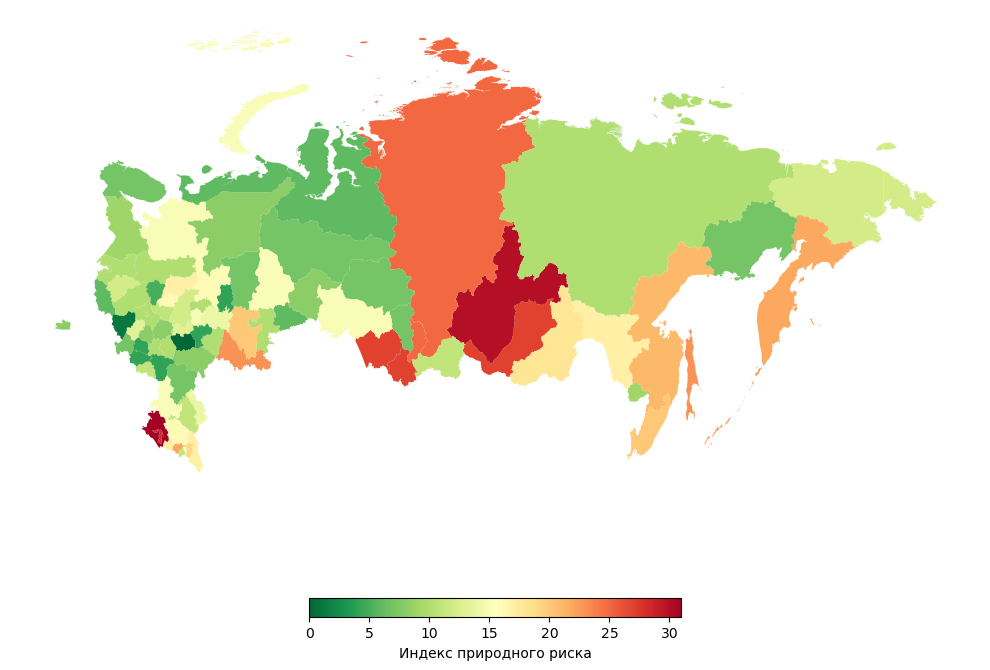

In [29]:
fig, ax = plt.subplots(1, figsize=(16, 9))

ax.axis('off')

risk.plot(
    column='Индекс природного риска', 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': 'Индекс природного риска', "orientation": "horizontal", 'shrink': 0.3},
    ax=ax
)

plt.show()

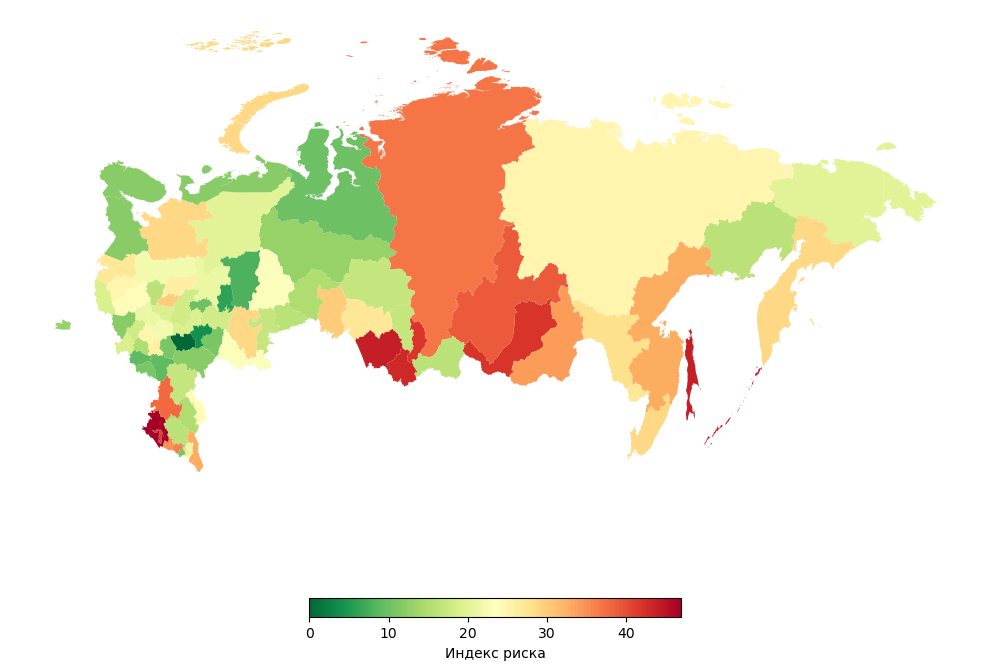

In [30]:
fig, ax = plt.subplots(1, figsize=(16, 9))

ax.axis('off')

risk.plot(
    column='Индекс риска', 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': 'Индекс риска', "orientation": "horizontal", 'shrink': 0.3},
    ax=ax
)

plt.show()

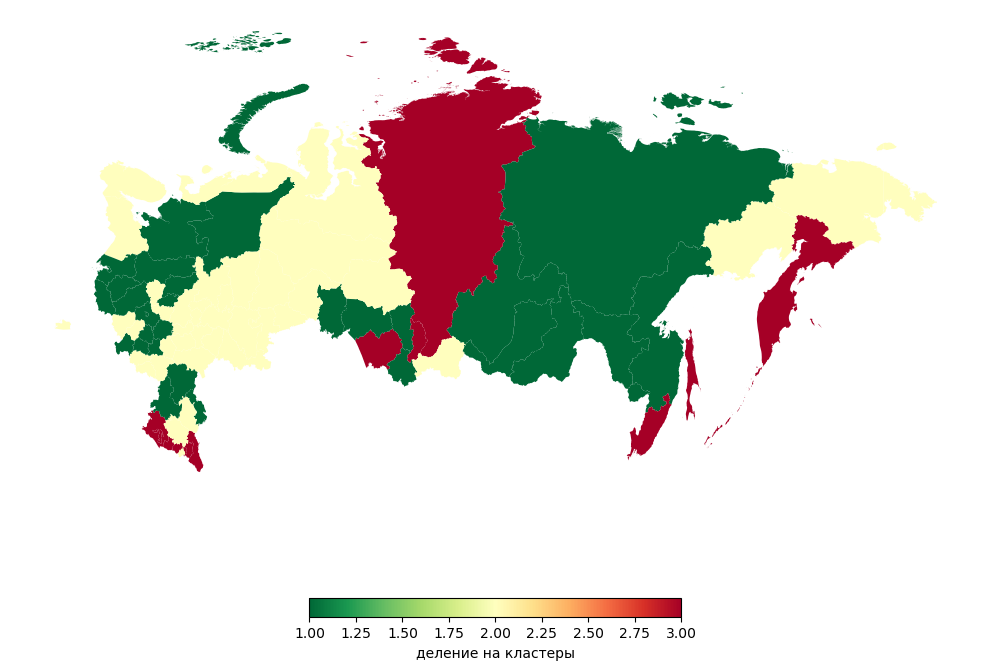

In [107]:
fig, ax = plt.subplots(1, figsize=(16, 9))

ax.axis('off')

risk.plot(
    column='кластер (Kmeans)', 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': 'деление на кластеры', "orientation": "horizontal", 'shrink': 0.3},
    ax=ax
)

plt.show()

In [40]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable



In [44]:
df1 = pd.read_excel('index_R.xlsx')
df1.head()

,region,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,...,чс из-за сильного ветра,чс из-за сильных дождей,температурные аномалии,сильный снег и метели,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность
0,Buryat,0,2,0,1,2,0,3,2,3,...,0,1,2,0,2,1,0,2,2,0
1,Sakha,1,0,1,1,0,2,0,0,2,...,0,0,3,0,0,0,0,0,0,0
2,Zabaykal'ye,1,3,2,0,2,3,2,2,0,...,1,1,0,0,0,0,0,2,0,0
3,Kamchatka,2,0,0,2,0,0,3,0,0,...,3,0,0,2,0,0,0,0,0,3
4,Primor'ye,2,0,0,0,0,2,0,3,0,...,1,3,0,1,3,0,0,0,0,0


In [77]:
from statsmodels.multivariate.factor import Factor
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import PCA


In [80]:
df2 = df1.drop(columns = ['region', 'Cluster'])
df2

,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,аварии на жд зимой,...,чс из-за сильного ветра,чс из-за сильных дождей,температурные аномалии,сильный снег и метели,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность
0,0,2,0,1,2,0,3,2,3,0,...,0,1,2,0,2,1,0,2,2,0
1,1,0,1,1,0,2,0,0,2,1,...,0,0,3,0,0,0,0,0,0,0
2,1,3,2,0,2,3,2,2,0,0,...,1,1,0,0,0,0,0,2,0,0
3,2,0,0,2,0,0,3,0,0,0,...,3,0,0,2,0,0,0,0,0,3
4,2,0,0,0,0,2,0,3,0,0,...,1,3,0,1,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,1,0,0,0,...,1,2,0,0,0,0,0,0,0,0
79,1,0,1,1,2,1,0,3,0,0,...,1,1,0,2,0,0,0,0,0,0
80,1,0,1,1,0,3,2,3,1,2,...,2,1,0,0,0,0,0,0,0,0
81,1,2,0,1,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# principal component analysis on features
pca = PCA()

# fit and transform X_norm to PCA dataframe
X_pca = pca.fit_transform(df2)

# converting to dataframe
names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pcadf = pd.DataFrame(X_pca, columns=names)


print(X_pcadf.head())
print("-----------------------------------")
print("Shape of PCA DataFrame:", X_pcadf.shape)

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.538399  1.359234  3.690859 -0.229587 -2.214195  0.663007 -1.784244   
1 -0.458755  1.421434  1.259703 -0.985750 -2.283267  0.680285  1.178029   
2  0.700561  0.825091  2.056379 -1.657796 -1.018954  3.444658  1.218908   
3  2.822845 -2.853097  1.487161 -0.101025  1.001517 -1.741124 -0.284878   
4  2.788587 -0.705395 -1.240712  0.191372  1.717098  0.959103  3.784118   

        PC8       PC9      PC10  ...      PC30      PC31      PC32      PC33  \
0  1.392561  1.089134 -2.604829  ... -0.244364  0.115405  0.296833 -0.308008   
1 -2.688373  2.014987  1.105944  ... -0.001589 -0.351863 -0.667118 -0.259288   
2  2.696144 -0.256722  0.537811  ...  0.052769  0.667598 -0.253623  0.006552   
3  0.393701 -1.330577  0.503668  ... -0.000962 -0.423719 -0.342424 -0.205560   
4  0.290503 -0.657282 -0.039670  ... -0.764139 -0.507860 -0.361628 -0.386781   

       PC34      PC35      PC36      PC37      PC38      PC39  
0  0

In [82]:
corr_matrix = df2.corr()
corr_matrix

,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,аварии на жд зимой,...,чс из-за сильного ветра,чс из-за сильных дождей,температурные аномалии,сильный снег и метели,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность
аварии на ком системах до муниципального уровня,1.000000,0.056495,0.082928,0.518128,-0.065696,0.191645,0.326628,0.327549,0.138475,0.034403,...,0.075664,0.361714,0.174820,0.106493,0.385646,0.145718,-0.066989,-0.083945,0.192105,0.221498
аварии на ком системах региональный уровень,0.056495,1.000000,-0.009673,0.112298,0.592592,0.074070,0.120143,0.145032,0.017964,-0.045846,...,-0.184221,-0.014945,-0.058941,-0.090039,0.022953,0.022294,-0.013142,0.232449,0.134079,-0.045536
взрывы бытового газа,0.082928,-0.009673,1.000000,0.079412,0.012945,0.640575,0.127431,0.205604,0.154436,0.005604,...,0.082360,0.178415,-0.023859,-0.073878,0.234216,0.043984,-0.094250,-0.123689,0.150252,0.223747
аварии на энергетических системах,0.518128,0.112298,0.079412,1.000000,0.082518,0.147586,0.278261,0.239176,0.233779,-0.053006,...,0.158067,0.194735,0.031347,0.111937,0.337071,0.021953,-0.126551,-0.149016,0.392756,0.300057
аварии на энергетических системах региональный уровень,-0.065696,0.592592,0.012945,0.082518,1.000000,0.046657,0.122697,0.273754,0.104700,-0.118688,...,-0.182974,-0.123467,0.015755,-0.084495,-0.054328,-0.041800,-0.151672,0.065460,-0.006260,-0.171620
пожары на объектах,0.191645,0.074070,0.640575,0.147586,0.046657,1.000000,0.158904,0.331605,0.117393,0.044145,...,-0.005618,0.138606,-0.040302,-0.038766,0.271997,-0.128952,-0.119524,-0.112134,0.173987,0.109196
движение на автодорогах зимой,0.326628,0.120143,0.127431,0.278261,0.122697,0.158904,1.000000,0.344972,0.106739,0.015354,...,0.074857,0.032480,0.147404,0.115779,0.154352,0.074646,0.022553,0.140223,0.176734,0.215816
движение на автодорогах летом,0.327549,0.145032,0.205604,0.239176,0.273754,0.331605,0.344972,1.000000,0.151768,0.074476,...,-0.053285,0.110186,0.000478,-0.055788,0.187549,-0.106586,-0.216550,-0.110688,0.326194,0.270559
обрушение зданий,0.138475,0.017964,0.154436,0.233779,0.104700,0.117393,0.106739,0.151768,1.000000,0.105034,...,0.028068,-0.088497,0.134161,0.013014,0.181589,0.216873,-0.071568,0.029904,0.193354,-0.074364
аварии на жд зимой,0.034403,-0.045846,0.005604,-0.053006,-0.118688,0.044145,0.015354,0.074476,0.105034,1.000000,...,-0.064976,0.011510,-0.062892,-0.064933,-0.092135,0.116924,0.009576,0.020020,-0.066968,-0.119234


In [84]:
# calculate eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(corr_matrix)

# sort the eigenvalues and eigenvectors in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
num_cols = [col for col in df2.columns if df2[col].dtype in ['int64','float64']]
# convert to dataframes
eigenvalues_df = pd.DataFrame({'Eigenvalue': eigenvalues}, index=df2[num_cols].columns)
eigenvalues_df['Proportion'] = eigenvalues_df['Eigenvalue'] / eigenvalues_df['Eigenvalue'].sum()
eigenvalues_df['Cumulative Proportion'] = eigenvalues_df['Proportion'].cumsum()

# display dataframes
print("Eigenvalues:")
display(eigenvalues_df.style.format({'Eigenvalue': '{:.4f}', 'Proportion': '{:.4f}', 'Cumulative Proportion': '{:.4f}'}))

Eigenvalues:


,Eigenvalue,Proportion,Cumulative Proportion
аварии на ком системах до муниципального уровня,5.1096,0.1310,0.1310
аварии на ком системах региональный уровень,3.2992,0.0846,0.2156
взрывы бытового газа,2.7608,0.0708,0.2864
аварии на энергетических системах,2.5914,0.0664,0.3528
аварии на энергетических системах региональный уровень,2.2610,0.0580,0.4108
пожары на объектах,2.0624,0.0529,0.4637
движение на автодорогах зимой,1.9780,0.0507,0.5144
движение на автодорогах летом,1.6552,0.0424,0.5569
обрушение зданий,1.5627,0.0401,0.5969
аварии на жд зимой,1.3033,0.0334,0.6303


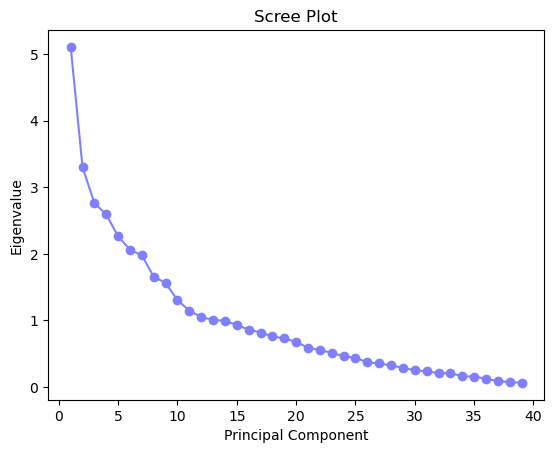

In [85]:
# plot scree plot
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', color='#8080ff')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [98]:
loadings = pd.DataFrame(pca.components_.T[:,:3], index=np.array(df2.columns), columns=names[:3])
loadings

,PC1,PC2,PC3
аварии на ком системах до муниципального уровня,0.254891,0.142239,-0.052984
аварии на ком системах региональный уровень,0.029935,0.056516,0.093885
взрывы бытового газа,0.158758,0.047641,-0.103070
аварии на энергетических системах,0.232071,0.061103,0.003066
аварии на энергетических системах региональный уровень,0.002670,0.054956,0.032359
пожары на объектах,0.220223,0.139442,-0.264453
движение на автодорогах зимой,0.228220,0.228252,0.066068
движение на автодорогах летом,0.304776,0.275977,-0.150153
обрушение зданий,0.058264,0.249842,0.066621
аварии на жд зимой,-0.029834,0.335173,0.008808


In [100]:
X_norm = df2

# fit factor analyzer with principal components and varimax rotation
fa = FactorAnalyzer(rotation="varimax", n_factors=3, method='principal')
fa.fit(X_norm)

# get the rotated factor pattern
loadings2 = pd.DataFrame(fa.loadings_, index=X_norm.columns, columns=[f"Factor{i+1}" for i in range(3)])
rotated_factor_pattern = loadings2[abs(loadings2) >= 0.4].dropna(how='all')

# display the results
rotated_factor_pattern

,Factor1,Factor2,Factor3
аварии на ком системах до муниципального уровня,0.571639,NaN,NaN
аварии на ком системах региональный уровень,NaN,0.668823,NaN
взрывы бытового газа,0.441269,NaN,NaN
аварии на энергетических системах,0.576103,NaN,NaN
аварии на энергетических системах региональный уровень,NaN,0.530676,NaN
пожары на объектах,0.441037,NaN,NaN
движение на автодорогах зимой,0.404519,NaN,NaN
движение на автодорогах летом,0.492205,NaN,NaN
аварии на жд зимой,NaN,NaN,0.660040
аварии на жд летом,NaN,NaN,0.557885


In [91]:
# obtain the factor scores
factor_scores = fa.transform(X_norm)

# convert to dataframe
factor_scores_df = pd.DataFrame(factor_scores, columns=['Фактор 1', 'Фактор 2',
                                                        'Фактор 3', 'Фактор 4'])

# add the factor scores as new columns to your original dataframe
df_with_factor_scores = pd.concat([df2, factor_scores_df], axis=1)
df_with_factor_scores = df_with_factor_scores.dropna()

In [92]:
df_with_factor_scores

,аварии на ком системах до муниципального уровня,аварии на ком системах региональный уровень,взрывы бытового газа,аварии на энергетических системах,аварии на энергетических системах региональный уровень,пожары на объектах,движение на автодорогах зимой,движение на автодорогах летом,обрушение зданий,аварии на жд зимой,...,вер-ть чс из-за гололеда,чс с крупным шрадом,чс из-за засухи,чс из-за почвенной засухи,вер-ть чс связанных с селевой опасностью,лавинная опасность,Фактор 1,Фактор 2,Фактор 3,Фактор 4
0,0,2,0,1,2,0,3,2,3,0,...,2,1,0,2,2,0,0.532858,3.931298,0.132722,0.235887
1,1,0,1,1,0,2,0,0,2,1,...,0,0,0,0,0,0,-0.508468,0.928305,0.857379,-0.814507
2,1,3,2,0,2,3,2,2,0,0,...,0,0,0,2,0,0,0.217557,4.152769,-0.477002,-0.207143
3,2,0,0,2,0,0,3,0,0,0,...,0,0,0,0,0,3,1.852795,-0.408483,-1.352999,-0.099438
4,2,0,0,0,0,2,0,3,0,0,...,3,0,0,0,0,0,1.454505,0.040397,-0.199875,-0.012103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,-0.184691,-0.316074,-1.479199,0.181817
79,1,0,1,1,2,1,0,3,0,0,...,0,0,0,0,0,0,-0.334230,0.384592,0.417580,-0.435948
80,1,0,1,1,0,3,2,3,1,2,...,0,0,0,0,0,0,-0.167639,-0.500737,1.171173,-0.118896
81,1,2,0,1,2,1,1,3,0,0,...,0,0,0,0,0,0,-0.839348,1.347210,-0.420140,-1.116199


In [94]:
df_with_factor_scores.to_excel('df2.xlsx')

In [42]:
from kmodes.kmodes import KModes

In [66]:
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(df1)
df1['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 12, cost: 1074.0
Run 1, iteration: 2/100, moves: 1, cost: 1074.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 27, cost: 1091.0
Run 2, iteration: 2/100, moves: 7, cost: 1086.0
Run 2, iteration: 3/100, moves: 7, cost: 1073.0
Run 2, iteration: 4/100, moves: 0, cost: 1073.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 11, cost: 1092.0
Run 3, iteration: 2/100, moves: 4, cost: 1084.0
Run 3, iteration: 3/100, moves: 2, cost: 1079.0
Run 3, iteration: 4/100, moves: 2, cost: 1078.0
Run 3, iteration: 5/100, moves: 0, cost: 1078.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 13, cost: 1081.0
Run 4, iteration: 2/100, moves: 2, cost: 1081.0
Init: initializing centroids
Init: initializing clus

In [67]:
centroids = km.cluster_centroids_
print("Cluster Centroids:")
print(centroids)

# Cluster analysis
for cluster in range(km.n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_data = df1[df1['Cluster'] == cluster]
    print(cluster_data.describe(include='all'))

Cluster Centroids:
[['Bashkortostan' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '1']
 ['Adygey' '2' '0' '0' '1' '0' '0' '1' '1' '0' '0' '0' '0' '0' '0' '0'
  '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '1' '2' '1'
  '0' '0' '0' '0' '0' '0' '0']
 ['Altay' '0' '0' '0' '2' '0' '0' '1' '1' '0' '1' '0' '0' '1' '0' '1' '0'
  '1' '0' '0' '0' '0' '0' '2' '0' '0' '0' '0' '0' '0' '0' '0' '0' '1' '0'
  '0' '0' '0' '0' '0' '2']]

Cluster 0:
       region  аварии на ком системах до муниципального уровня  \
count      51                                        51.000000   
unique     51                                              NaN   
top     Sakha                                              NaN   
freq        1                                              NaN   
mean      NaN                                         0.647059   
std       NaN                         

In [68]:
risk['Cluster'] = clusters

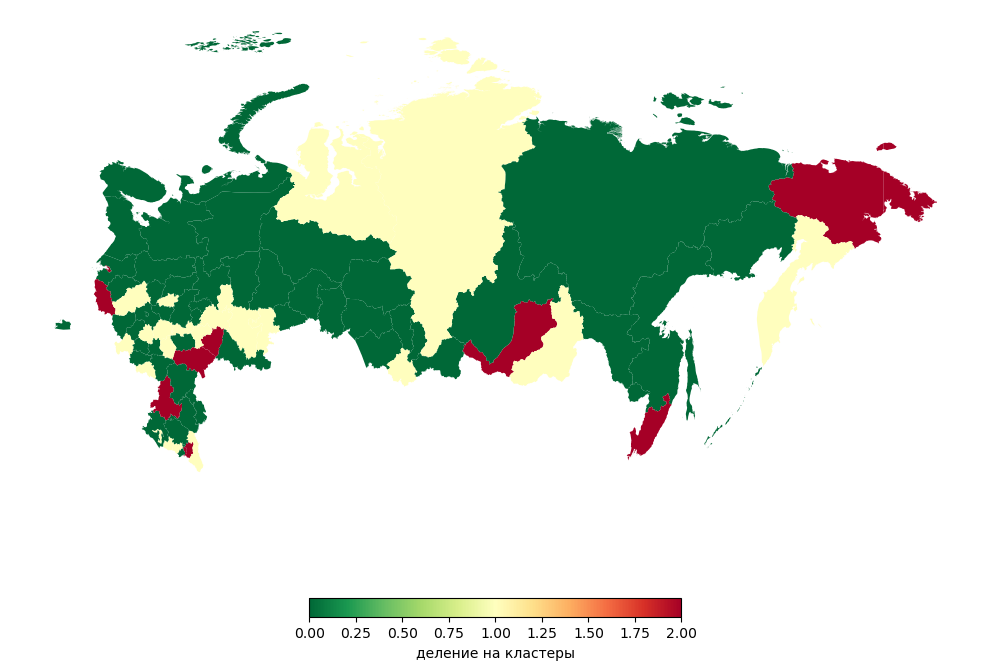

In [70]:
fig, ax = plt.subplots(1, figsize=(16, 9))

ax.axis('off')

risk.plot(
    column='Cluster', 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': 'деление на кластеры', "orientation": "horizontal", 'shrink': 0.3},
    ax=ax
)

plt.show()